In [212]:
#Import Liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
#Import dataset
dataset= pd.read_csv('Pima_Indians.csv')

In [214]:
#total rows and columns in dataset
print("shape: ", dataset.shape)
dataset.head()

shape:  (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [215]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [216]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [217]:
#filling blank space with NaN
data= dataset.replace(r'^\s*$', np.nan, regex=True)

In [218]:
#Count null values in each columns
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [219]:
dibetic= data[data['Outcome']==1]
Non_dibetic= data[data['Outcome']==0]
total= data['Outcome']

In [220]:
print('No of dibetics are : ', len(dibetic))
print('percentage of dibetic are: ', len(dibetic)/len(total)*100)
print('No of non-dibetics are : ', len(Non_dibetic))
print('percentage of non-dibetic are: ', len(Non_dibetic)/len(total)*100)

No of dibetics are :  268
percentage of dibetic are:  34.89583333333333
No of non-dibetics are :  500
percentage of non-dibetic are:  65.10416666666666


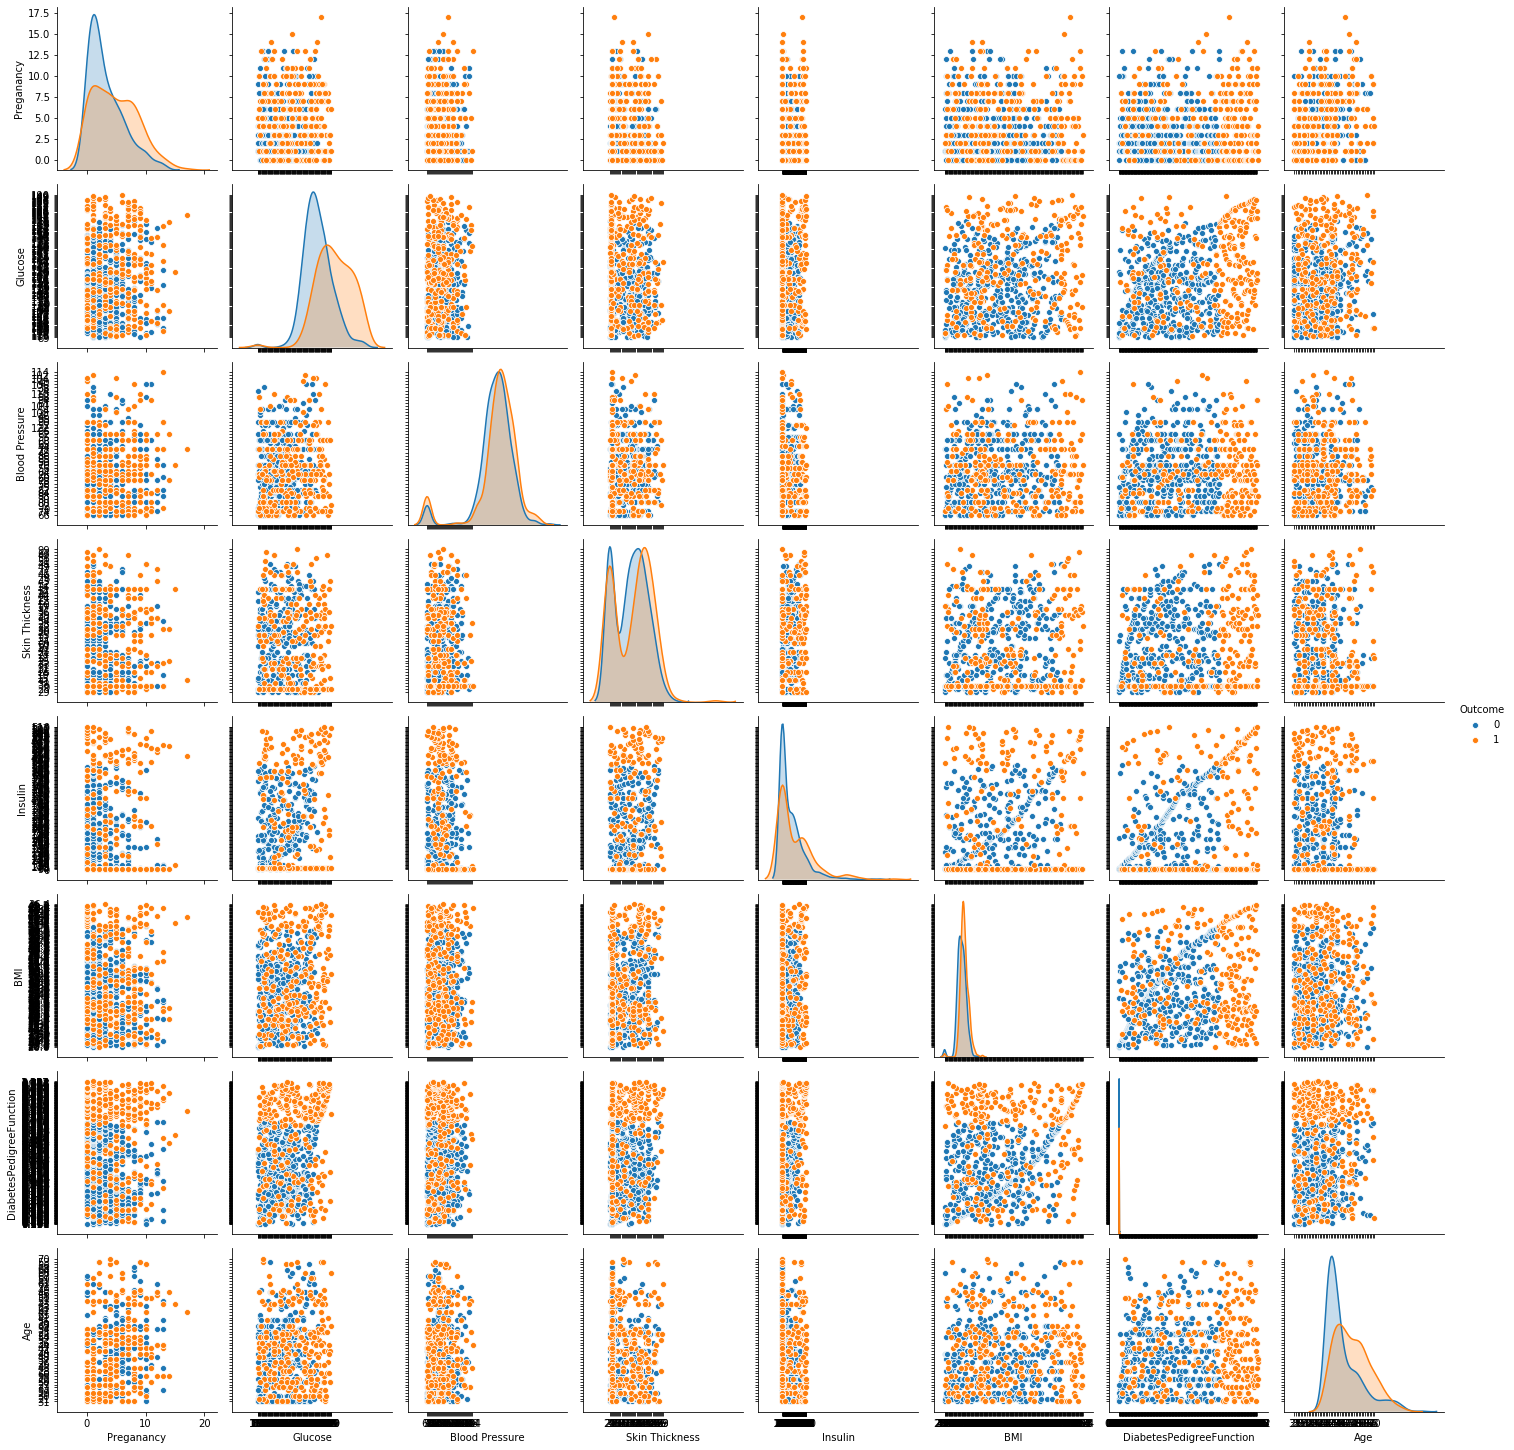

In [19]:
sns.pairplot(data, hue='Outcome')

In [221]:
def plot_histograms():
    """ Plot histograms of all features"""
    
    fig, axs = plt.subplots(4, 2, figsize=(22, 18))
    fig.subplots_adjust(hspace = 0.5, wspace=0.2)
    axs = axs.ravel()
    for i in range(8):
        axs[i].hist(data[data['Outcome']==0][data.columns[i]],
                    10, alpha=0.5, label='non-diabetes')
        axs[i].hist(data[data['Outcome']==1][data.columns[i]],
                    10, alpha=0.5, label='diabetes')
        axs[i].set_title(data.columns[i])
        axs[i].legend(loc='upper right')
        axs[i].set_ylabel('Frequency')
        axs[i].grid()

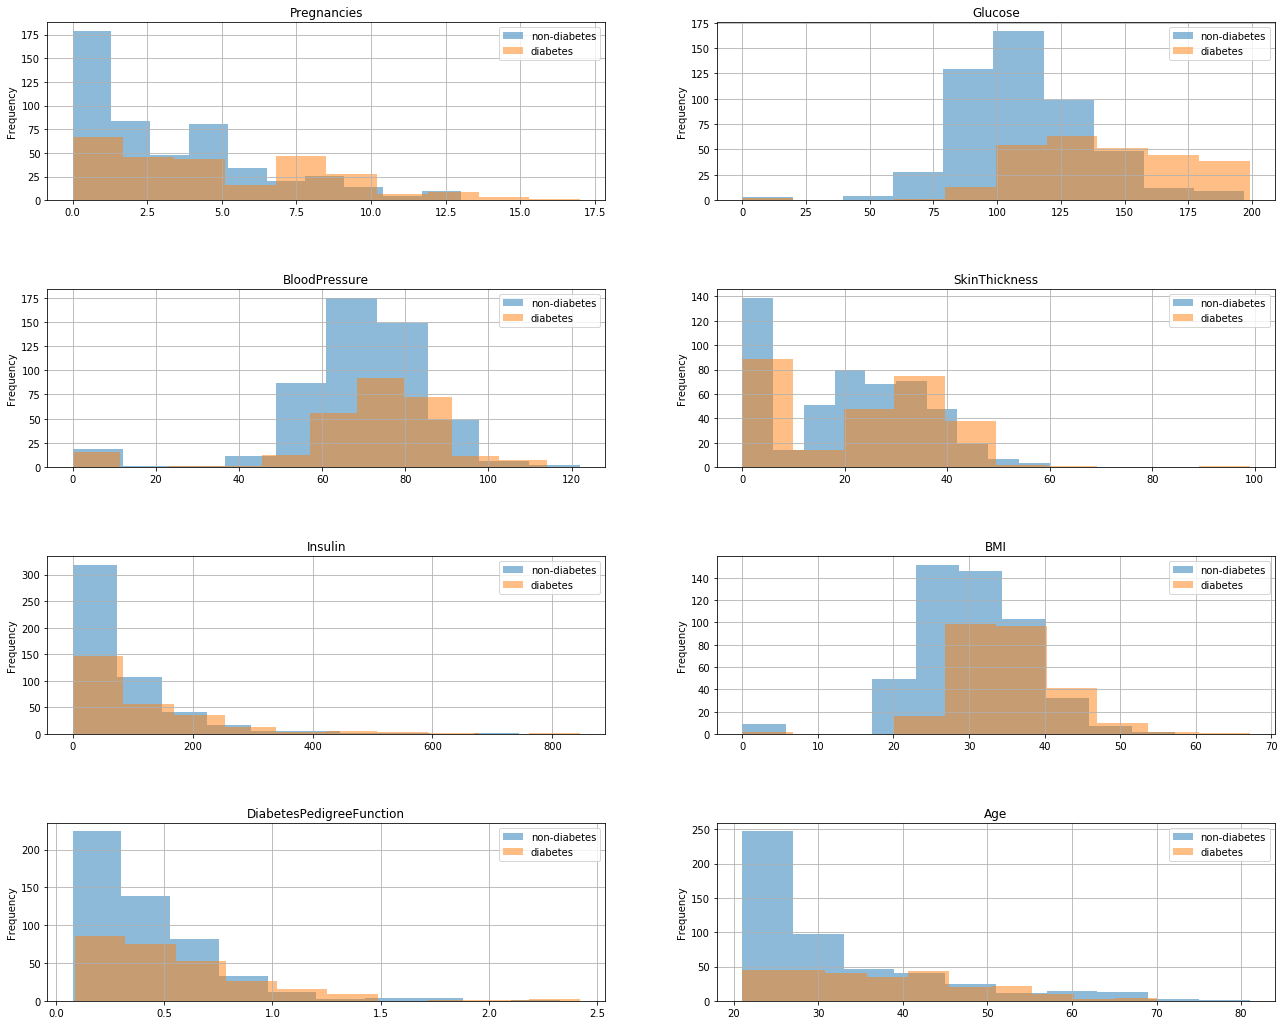

In [222]:
plot_histograms()

In [223]:
corr= data.corr()

In [224]:
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


## Missing Values imputation

In [225]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [226]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The body mass index of a person could not be 0. Also the features glucose, blood pressure and insulin could not be equal to zero. So it seems that missing values were filled by 0. This is of course a way to handle missing values. But it is also possible to find a better solution.

In [227]:
features_with_missing_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [228]:
def label_missing_values(s):
    """ Label missing values (=0) with None """
    if s == 0:
        return None
    else:
        return s

In [229]:
for feature in features_with_missing_values:
    data[feature] = data[feature].apply(label_missing_values)

In [230]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [231]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [232]:
for feature in features_with_missing_values:
    data[feature] = data[feature].fillna(data[feature].mean())

In [233]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [234]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [235]:
X = data.drop('Outcome',axis=1).values
y = data['Outcome'].values

In [236]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [237]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X)

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16629174,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85253118,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33283341,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.91074963,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34311972,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29945588,
        -0.47378505, -0.87137393]])

In [238]:
from sklearn.model_selection import train_test_split

In [239]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [240]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [241]:
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [242]:
# let's visualise those features that were selected.
# (selected features marked with True)

sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [243]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [244]:
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

## Predictions and Evaluations
Let's evaluate our KNN model!

In [245]:

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[78 29]
 [25 22]]


In [246]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       107
           1       0.43      0.47      0.45        47

    accuracy                           0.65       154
   macro avg       0.59      0.60      0.60       154
weighted avg       0.66      0.65      0.65       154



## Choosing K Value

In [247]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

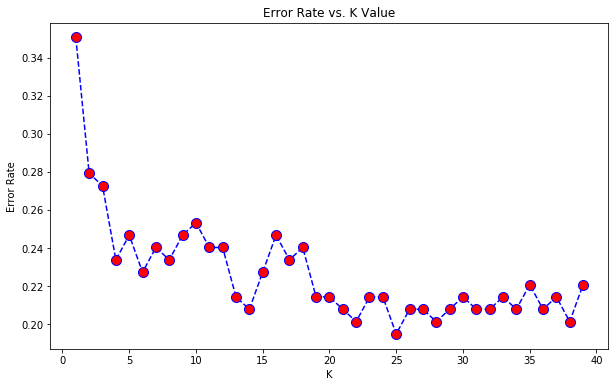

In [248]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [249]:
# NOW WITH K=25
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[94 13]
 [17 30]]


              precision    recall  f1-score   support

           0       0.85      0.88      0.86       107
           1       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154



In [250]:
import joblib

In [254]:
joblib.dump(pred, 'Dibeties_Detector.pkl')

['Dibeties_Detector.pkl']

In [255]:
import pickle

In [257]:
pickle.dump(pred, open('Dibeties_Detector.pkl','wb'))

model = pickle.load(open('Dibeties_Detector.pkl','rb'))
print(model.predict([[0, 137, 40, 35, 168, 43.1,2.288,33]]))

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [253]:
model = pickle.load(open('Dibeties_Detector.pkl', 'rb'))


UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 44: character maps to <undefined>

In [ ]:
0	137	40	35	168	43.1	2.288	33